In [158]:
import numpy as np
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('always')

In [203]:
data=pd.read_csv('training_frame.csv')
data.shape

(100000, 12)

Text(0.5, 0, 'Coded')

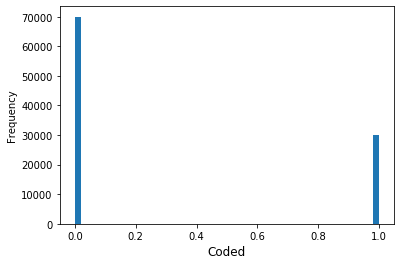

In [182]:
data['Coded'].plot.hist(bins = 50)
plt.xlabel('Coded', fontsize=12)

In [183]:
data.drop_duplicates(subset='patient_id', keep='first', inplace=True)

In [184]:
data.drop(['Unnamed: 0','vitals_datetime','machine_id','patient_id'],axis=1,inplace=True)

In [185]:
x=data.drop(['Coded'],axis=1)
y=data['Coded']
x.shape, y.shape

((126, 7), (126,))

In [186]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [188]:
cols=train_x.columns
cols

Index(['heart_rate', 'respiration_over_impedence',
       'spirometry_oxygen_saturation', 'pulse', 'blood_pressure_systolic',
       'blood_pressure_diastolic', 'blood_pressure_average'],
      dtype='object')

In [189]:
train_x_scaled=scaler.fit_transform(train_x)
train_x_scaled=pd.DataFrame(train_x_scaled,columns=cols)
train_x_scaled.head()

,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average
0,0.513761,0.2875,0.625000,0.528846,0.460317,0.454545,0.268293
1,0.220183,0.2250,0.833333,0.211538,0.817460,0.818182,0.674797
2,0.293578,0.2250,0.958333,0.230769,0.650794,0.714286,0.430894
3,0.119266,0.2500,1.000000,0.096154,0.373016,0.649351,0.406504
4,0.357798,0.2000,1.000000,0.346154,0.293651,0.584416,0.317073


In [190]:
test_x_scaled=scaler.transform(test_x)
test_x_scaled=pd.DataFrame(test_x_scaled,columns=cols)
test_x_scaled.head()

,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average
0,0.247706,0.2125,1.000000,0.230769,0.333333,0.389610,0.300813
1,0.330275,0.2250,0.791667,0.586538,0.857143,0.324675,0.300813
2,0.284404,0.1750,0.750000,0.278846,0.436508,0.285714,0.154472
3,1.018349,0.1750,1.000000,1.009615,0.277778,0.311688,0.268293
4,0.467890,0.2250,0.541667,0.451923,0.468254,0.584416,0.341463


In [191]:
#LR Imple

In [192]:
from sklearn.linear_model import LogisticRegression as Logreg
from sklearn.metrics import f1_score

In [193]:
logreg=Logreg()
logreg.fit(train_x,train_y)

C:\Users\yadda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
train_predict=logreg.predict(train_x)
train_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [195]:
k=f1_score(train_predict,train_y)
print("F1 SCORE:",k)

F1 SCORE: 0.0


C:\Users\yadda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [196]:
test_predict=logreg.predict(test_x)
k=f1_score(test_predict,test_y)
print("Test f1 score:",k)

Test f1 score: 0.0


C:\Users\yadda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yadda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [197]:
#Using predict_proba
train_predict=logreg.predict_proba(train_x)
train_predict

array([[9.46797958e-01, 5.32020415e-02],
       [9.99260121e-01, 7.39878550e-04],
       [9.82142891e-01, 1.78571085e-02],
       [9.98929840e-01, 1.07016044e-03],
       [9.96170724e-01, 3.82927614e-03],
       [9.12439219e-01, 8.75607809e-02],
       [9.99606745e-01, 3.93254968e-04],
       [9.70588705e-01, 2.94112946e-02],
       [9.97895718e-01, 2.10428204e-03],
       [9.89067885e-01, 1.09321147e-02],
       [9.68388969e-01, 3.16110306e-02],
       [9.99841822e-01, 1.58177574e-04],
       [9.28069190e-01, 7.19308095e-02],
       [9.94049534e-01, 5.95046639e-03],
       [9.99520215e-01, 4.79785230e-04],
       [9.71802386e-01, 2.81976142e-02],
       [9.94595340e-01, 5.40465988e-03],
       [9.93280129e-01, 6.71987117e-03],
       [9.76645974e-01, 2.33540256e-02],
       [9.98791896e-01, 1.20810388e-03],
       [9.99276283e-01, 7.23717197e-04],
       [9.97769569e-01, 2.23043083e-03],
       [9.10179421e-01, 8.98205794e-02],
       [9.99888297e-01, 1.11703250e-04],
       [9.926503

In [198]:
train_preds=train_predict[:,1]
train_preds

array([5.32020415e-02, 7.39878550e-04, 1.78571085e-02, 1.07016044e-03,
       3.82927614e-03, 8.75607809e-02, 3.93254968e-04, 2.94112946e-02,
       2.10428204e-03, 1.09321147e-02, 3.16110306e-02, 1.58177574e-04,
       7.19308095e-02, 5.95046639e-03, 4.79785230e-04, 2.81976142e-02,
       5.40465988e-03, 6.71987117e-03, 2.33540256e-02, 1.20810388e-03,
       7.23717197e-04, 2.23043083e-03, 8.98205794e-02, 1.11703250e-04,
       7.34968085e-03, 7.86358571e-03, 6.17510194e-03, 5.52723533e-02,
       3.15353195e-03, 3.33783399e-03, 3.71086133e-04, 2.16010401e-03,
       5.96265102e-03, 4.98402198e-04, 5.98960014e-04, 7.53358471e-03,
       4.68368166e-03, 4.01417610e-03, 3.33194087e-03, 1.77297307e-02,
       2.27435684e-02, 1.34802106e-02, 4.35316330e-04, 3.23206219e-01,
       2.61086381e-02, 2.00052781e-01, 3.73176143e-03, 1.30216603e-03,
       6.05035202e-03, 2.53752152e-03, 1.22248664e-03, 3.42903604e-02,
       9.60578448e-03, 2.10138225e-01, 2.18559220e-03, 2.23338585e-02,
      

In [199]:
for i in range(0,len(train_preds)):
    if(train_preds[i]>0.001):
        train_preds[i]=1
    else:
        train_preds[i]=0

In [200]:
k=f1_score(train_preds,train_y)
print("F1 score:",k)

F1 score: 0.05


In [201]:
#confusionMatrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(test_y,test_predict)
cf

array([[32]], dtype=int64)

In [202]:
from sklearn.metrics import classification_report as rp
print(rp(test_y,test_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        32

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

